In [284]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [285]:
t, y0, z = sp.symbols('t, y_0,  z')
N=100
a,b=0,1
ya=1 #f(a)=ya, donde a es la abscisa inicial

## Ejercicio 1

In [286]:
def f(t,z):
    return (t-z)/2

def sol_exacta(f,a,ya):

  # Definimos y como una función simbólica
  y = sp.Function('y')

  # Declaramos la EDO
  edo = y(t).diff(t)-f(t,y(t))

  # La igualamos a 0
  sp.Eq(edo,0)

  # Resolvemos simbólicamente la EDO
  edo_sol = sp.dsolve(edo)

  # Imponemos las condiciones iniciales
  ics = {y(a): y0}

  # De esta manera haríamos la sustituciones correspondientes
  edo_sol.rhs.subs(t, a),edo_sol.lhs.subs(t, a).subs(ics)

  # Ecuación asociada al PVI
  CI_eq = sp.Eq(edo_sol.lhs.subs(t, a).subs(ics),edo_sol.rhs.subs(t, a))

  # Solución del PVI
  CI_sol = sp.solve(CI_eq)

  # Única solución exacta de nuestro PVI
  sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})

  return sol_exacta

In [287]:
#Obtencion de valores exactos
xx = np.linspace(a, b, N+1)
sol_exacta=sol_exacta(f,a,ya)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

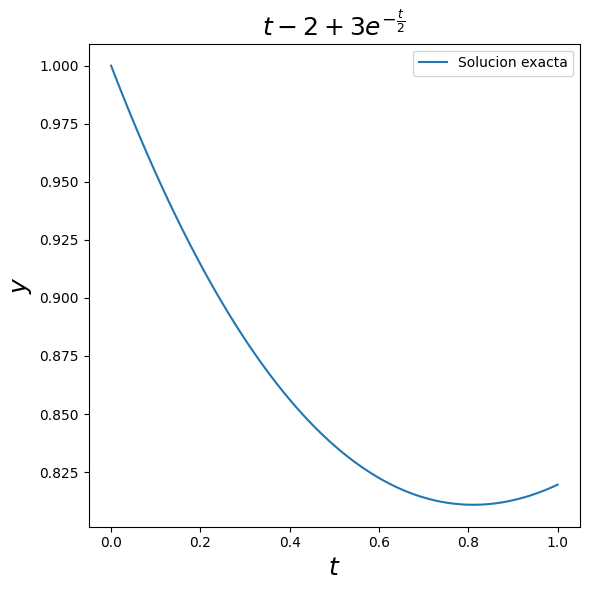

In [288]:
#Grafica
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
ax.plot(xx, valores_exactos, label="Solucion exacta")
ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

## Ejercicio 2

In [289]:
def euler_mejorado(F,x0,y0,xfinal,N):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n] + h/2,Y[n] + (h/2)*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Aproximacion para N= 10
[1.         0.95375    0.91462969 0.88229149 0.85640478 0.83665505
 0.82274311 0.81438439 0.81130815 0.81325688 0.8199856 ] 

Aproximacion para N= 15
[1.         0.96833333 0.93988981 0.9145638  0.89225309 0.87285887
 0.85628554 0.84244062 0.8312347  0.82258126 0.81639666 0.81259995
 0.81111288 0.81185973 0.81476729 0.81976474] 

Aproximacion para N= 20
[1.         0.9759375  0.95370342 0.93325261 0.91454107 0.89752583
 0.88216504 0.86841784 0.8562444  0.84560587 0.83646435 0.82878288
 0.82252543 0.81765683 0.81414281 0.8119499  0.81104552 0.81139783
 0.81297582 0.81574923 0.81968855] 

Aproximacion para N= 35
[1.         0.98602041 0.97264435 0.95986325 0.94766869 0.93605234
 0.925006   0.91452159 0.90459113 0.89520677 0.88636076 0.87804547
 0.87025336 0.86297703 0.85620915 0.84994251 0.84417    0.83888462
 0.83407944 0.82974768 0.8258826  0.82247758 0.81952612 0.81702176
 0.81495817 0.8133291  0.81212838 0.81134994 0.81098779 0.81103603
 0.81148883 0.81234045 

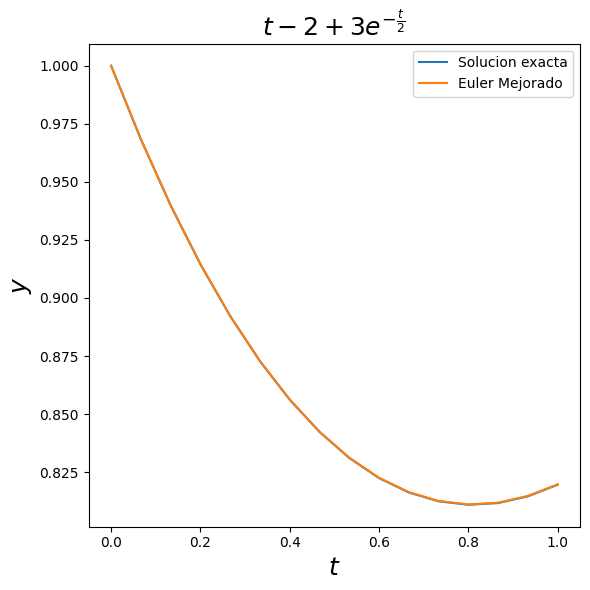

In [290]:
N=[10,15,20,35,50,100]
for n in (N):
  print("Aproximacion para N=",n)
  _, yy=euler_mejorado(f,a,ya,b,n)
  print(yy,"\n")

  if(n==15):
    #Obtencion de valores exactos
    xx = np.linspace(a, b, n+1)
    valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

    #Grafica
    fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
    ax.plot(xx, valores_exactos, label="Solucion exacta")
    ax.plot(xx, yy, label="Euler Mejorado")
    ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.legend()

    fig.tight_layout()

## Ejercicio 3

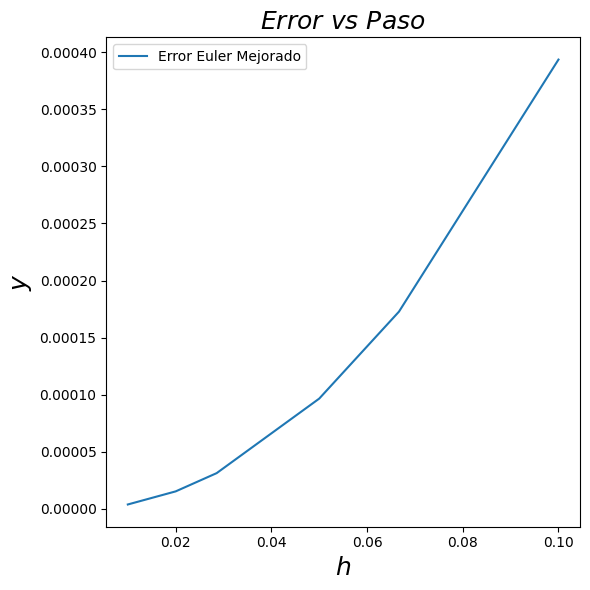

In [291]:
error=[]
H=[]

for n in (N):
  h=(b-a)/n
  H.append(h)

  #Obtencion de valores exactos
  xx,yy=euler_mejorado(f,a,ya,b,n)
  valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
  error.append((abs(valores_exactos-yy)).max())

#Grafica
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
ax.plot(H, error, label="Error Euler Mejorado")
ax.set_title(r"$Error\ vs\ Paso$", fontsize=18)
ax.set_xlabel(r"$h$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()




## Ejercicio 4

In [292]:
def Adams_Bashford4(F,x0,y0,xfinal,N):

  ''' Método de Adams-Bashforth (con k = 4) para resolver
  el problema de valores iniciales {y}' = {F(x,{y})},
  donde    {y} = {y[0],y[1],...y[N-1]}.
  X,Y    = integrate(F,x0,y0,xfinal,N).
  x0,y0  = condiciones iniciales
  xfinal = valor final de x
  N      = número de subintervalos de la partición
  h      = incremento de x usado en la integración
  F      = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''

  def AB4(F,x0,y0,y1,y2,y3,h):
      return (-9*F(x0,y0)+37*F(x0+h,y1)-59*F(x0+2*h,y2)+55*F(x0+3*h,y3))/24

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
  Y=[]
  _, Y[0:4] = euler_mejorado(F,x0,y0,x0+3*h,3)

  for n in range(N-3):
      Y.append(Y[n+3] + h*AB4(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],h))
  return np.array(X),np.array(Y)

Aproximacion para N= 10
[1.         0.95375    0.91462969 0.88229149 0.85635059 0.83655552
 0.8225993  0.81420236 0.81109159 0.81300977 0.81971138] 

Aproximacion para N= 15
[1.         0.96833333 0.93988981 0.9145638  0.89223624 0.872827
 0.85623894 0.84238059 0.83116211 0.82249702 0.8163016  0.81249489
 0.81099856 0.81173688 0.81463659 0.81962683] 

Aproximacion para N= 20
[1.         0.9759375  0.95370342 0.93325261 0.91453378 0.89751186
 0.88214449 0.86839113 0.85621184 0.84556776 0.83642099 0.82873456
 0.82247241 0.81759938 0.81408117 0.81188433 0.81097623 0.81132505
 0.81289977 0.81567012 0.81960656] 

Aproximacion para N= 35
[1.         0.98602041 0.97264435 0.95986325 0.94766729 0.93604961
 0.92500194 0.91451625 0.90458456 0.89519899 0.88635182 0.8780354
 0.87024219 0.8629648  0.85619588 0.84992824 0.84415476 0.83886844
 0.83406236 0.82972971 0.82586378 0.82245794 0.81950568 0.81700055
 0.81493622 0.81330643 0.81210502 0.81132591 0.81096311 0.81101072
 0.81146292 0.81231396 0.8

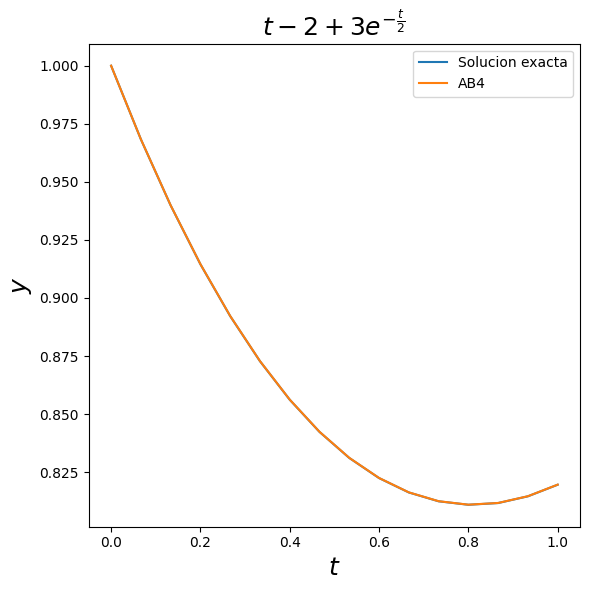

In [293]:
N=[10,15,20,35,50,100]
for n in (N):
  print("Aproximacion para N=",n)
  _, yy=Adams_Bashford4(f,a,ya,b,n)
  print(yy,"\n")

  if(n==15):
    #Obtencion de valores exactos
    xx = np.linspace(a, b, n+1)
    valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

    #Grafica
    fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
    ax.plot(xx, valores_exactos, label="Solucion exacta")
    ax.plot(xx, yy, label="AB4")
    ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.legend()

    fig.tight_layout()

## Ejercicio 5

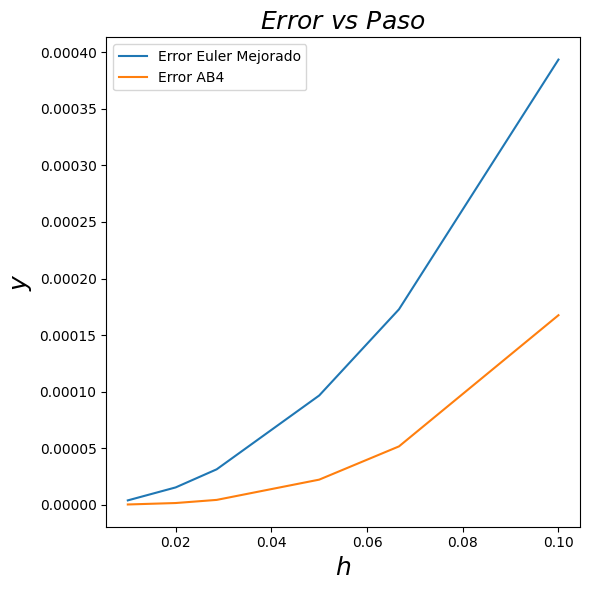

In [294]:
error_em=[]
error_ab=[]
H=[]

for n in (N):
  h=(b-a)/n
  H.append(h)

  #Obtencion de valores exactos
  xx,yy_em=euler_mejorado(f,a,ya,b,n)
  xx,yy_ab=Adams_Bashford4(f,a,ya,b,n)
  valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
  error_em.append((abs(valores_exactos-yy_em)).max())
  error_ab.append((abs(valores_exactos-yy_ab)).max())


#Grafica
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
ax.plot(H, error_em, label="Error Euler Mejorado")
ax.plot(H, error_ab, label="Error AB4")
ax.set_title(r"$Error\ vs\ Paso$", fontsize=18)
ax.set_xlabel(r"$h$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

Se puede observar que el error del método AB4 es menor que el de Euler Mejorado, incluso cuando aumenta el paso.